<a href="https://colab.research.google.com/github/AMorQ/Statistics/blob/main/Probability_Distributions_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions

- CDF (Cumulative Distribution Function):

    Meaning: The CDF of a random variable X, denoted as F(x), gives the probability that X will take a value less than or equal to x. In other words, it represents the cumulative probability up to a given point.

- PDF (Probability Density Function):

    Meaning: The PDF of a random variable X, denoted as f(x), describes the relative likelihood of X taking on a given value. It represents the probability density at a specific point.



## t-Student Distribution

PDF:

$f(x) = \frac{Γ((ν+1)/2)} {\sqrt{(πν)}  \Gamma(ν/2)]  (1 + (x^2/ν))^{-(ν+1)/2}}$
, where $\Gamma$ is the gamma function

    
  **Behavior at Zero:**

    The Student's t-distribution is symmetric around 0.
    At x = 0, the t-distribution has its peak (mode).
    The value of the PDF at x = 0 depends on the degrees of freedom (ν).

  **Comparison with normal distr.**

    As the degrees of freedom (ν) increase, the t-distribution approaches the standard normal distribution.
    For smaller degrees of freedom, the t-distribution has heavier tails than the normal distribution, meaning it has a higher probability of extreme values.





[1] 0.005123727 0.005748373 0.006458848 0.007268018 0.008190773
[1] 0.005161708 0.005704646 0.006314241 0.006999703 0.007771628


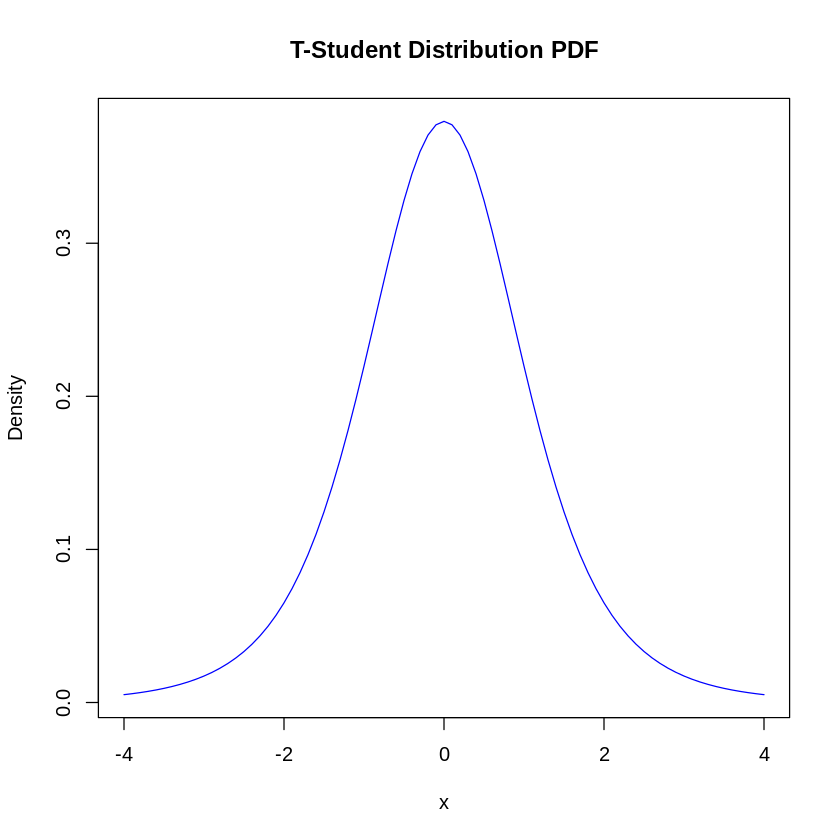

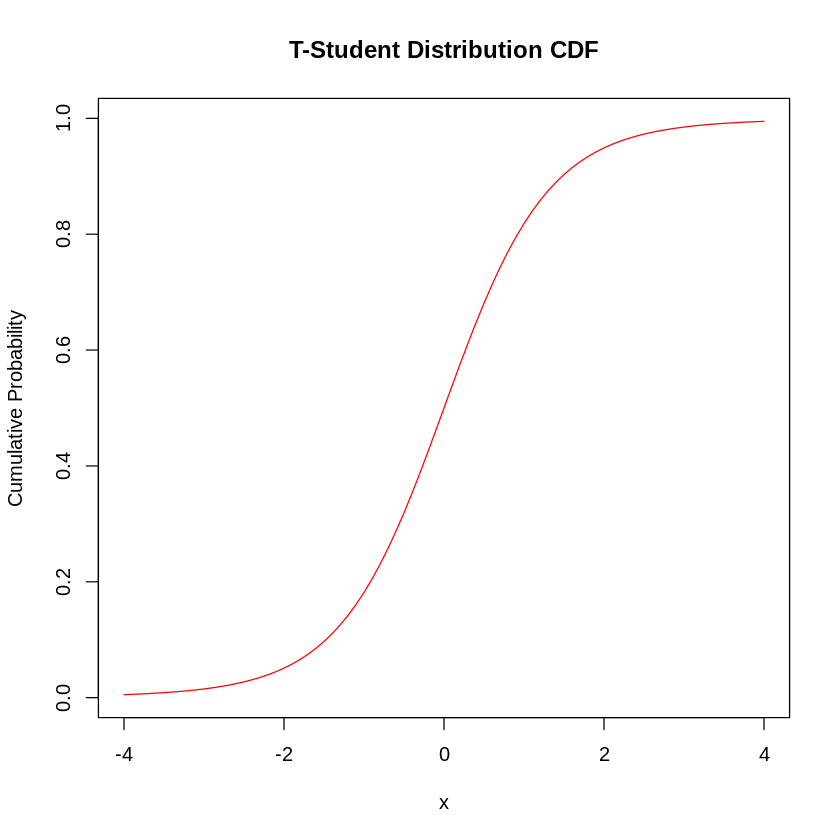

In [1]:
# Define degrees of freedom
df <- 5

# Define x-values for calculation
x <- seq(-4, 4, by = 0.1)

# Calculate PDF and CDF values
pdf_values <- dt(x, df)
cdf_values <- pt(x, df)

# Print some values
print(pdf_values[1:5]) # First 5 PDF values
print(cdf_values[1:5]) # First 5 CDF values

# Plot PDF
plot(x, pdf_values, type = "l", col = "blue",
     main = "T-Student Distribution PDF",
     xlab = "x", ylab = "Density")

# Plot CDF
plot(x, cdf_values, type = "l", col = "red",
     main = "T-Student Distribution CDF",
     xlab = "x", ylab = "Cumulative Probability")

## Pareto distribution:

Pareto distributions are often used to model phenomena where a small set of entities account for a large proportion of the total effect (e.g. wealth distribution, city sizes)

The probability density function (PDF) is:
$f(x) = (\alpha * x_{m}^\alpha) / (x^{(\alpha+1)})  \quad for \quad x ≥ x_m$

**Characteristics**

    long right tail and a peak near de lower bound.


**Behaviour at Zero**

    The Pareto distribution is typically defined for values greater than a minimum value, often denoted as x_m or scale. This minimum value is usually positive.
    Therefore, the Pareto distribution is undefined at x = 0.
    In practical terms, this means that the Pareto distribution is not suitable for modeling data that includes zero values or negative values.









Loading required package: VGAM

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘VGAM’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: stats4

Loading required package: splines



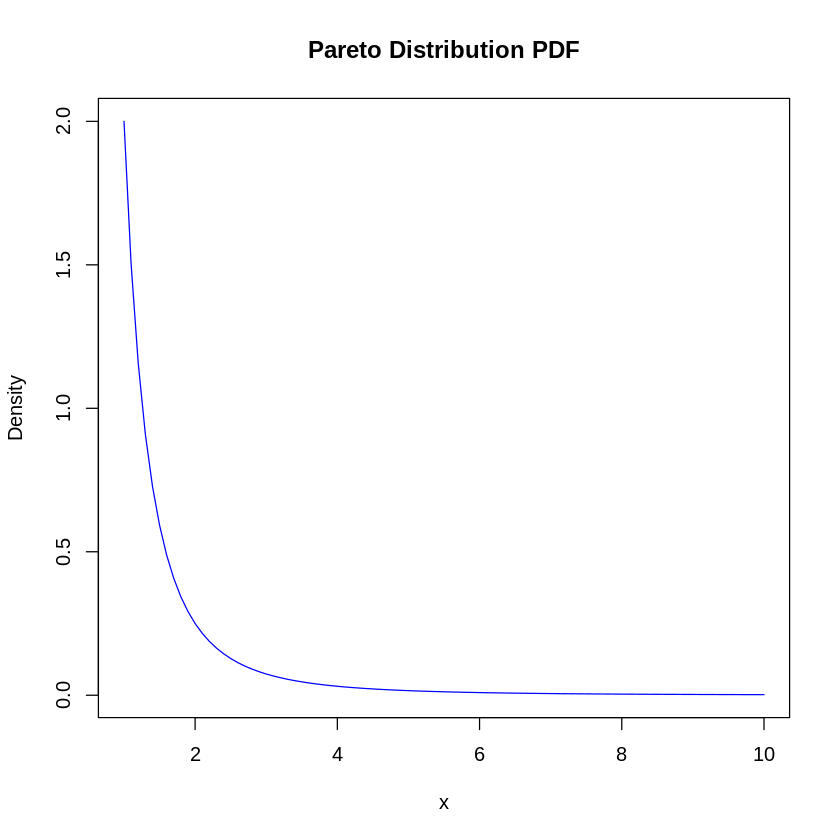

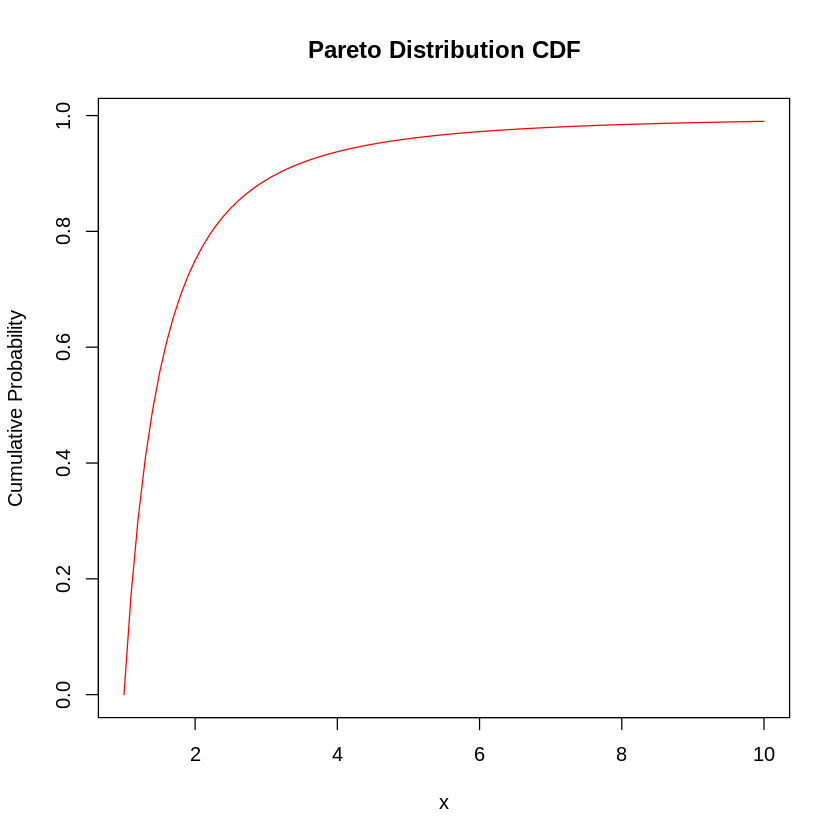

In [2]:
#calculate CDF and PDF

# Install and load the VGAM package if needed

if(!require("VGAM")) install.packages("VGAM")
library(VGAM)

# Define parameters
shape <- 2 # Shape parameter (alpha)
scale <- 1 # Scale parameter (x_m)

# Define x-values for plotting
x <- seq(scale, 10, by = 0.1) # Values from scale to 10

# Calculate PDF and CDF values
pdf_values <- dpareto(x, shape = shape, scale = scale)
cdf_values <- ppareto(x, shape = shape, scale = scale)

# Plot PDF
plot(x, pdf_values, type = "l", col = "blue",
     main = "Pareto Distribution PDF",
     xlab = "x", ylab = "Density")

# Plot CDF
plot(x, cdf_values, type = "l", col = "red",
     main = "Pareto Distribution CDF",
     xlab = "x", ylab = "Cumulative Probability")

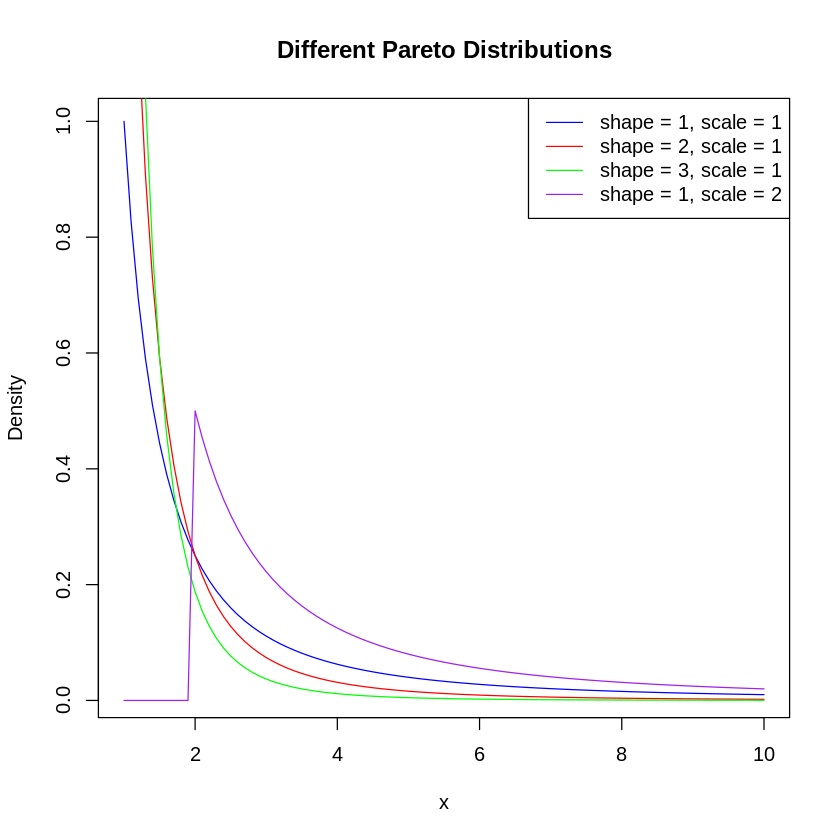

In [ ]:
# Define x-values for plotting
x <- seq(1, 10, by = 0.1)

# Create a plot for different Pareto distributions
plot(x, dpareto(x, shape = 1, scale = 1), type = "l", col = "blue",
     main = "Different Pareto Distributions",
     xlab = "x", ylab = "Density")

# Add lines for other shape and scale values
lines(x, dpareto(x, shape = 2, scale = 1), col = "red")
lines(x, dpareto(x, shape = 3, scale = 1), col = "green")
lines(x, dpareto(x, shape = 1, scale = 2), col = "purple")

# Add a legend
legend("topright", c("shape = 1, scale = 1", "shape = 2, scale = 1",
                     "shape = 3, scale = 1", "shape = 1, scale = 2"),
       col = c("blue", "red", "green", "purple"), lty = 1)


#Shape Parameter: Increasing the shape parameter makes the distribution less heavy-tailed and shifts the peak to the right.
#Scale Parameter: The scale parameter primarily affects the location of the distribution's lower bound.

## Exponential distribution

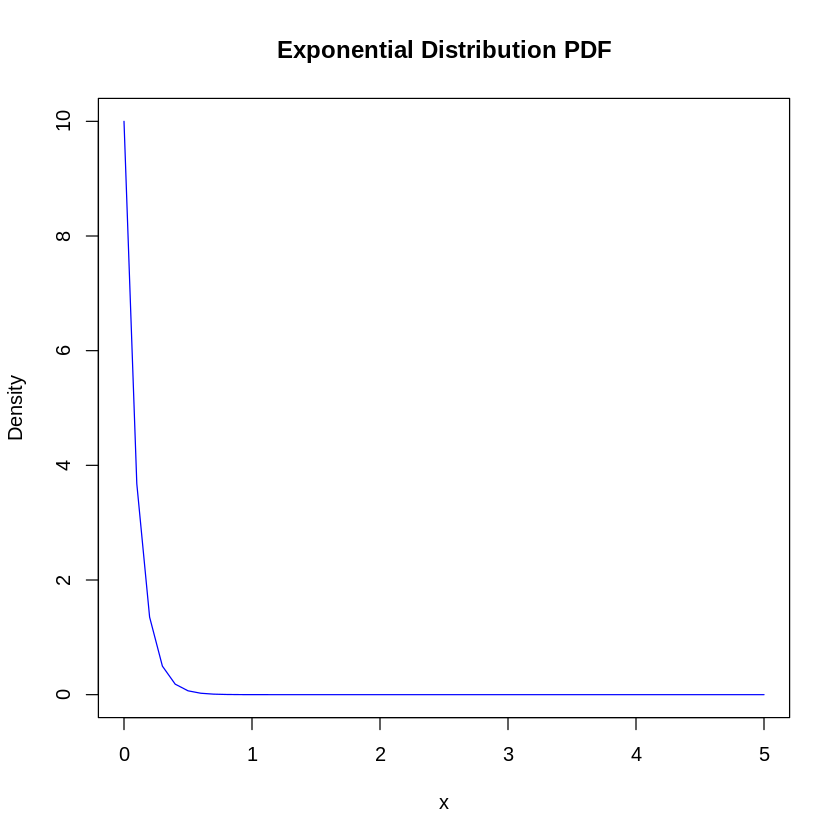

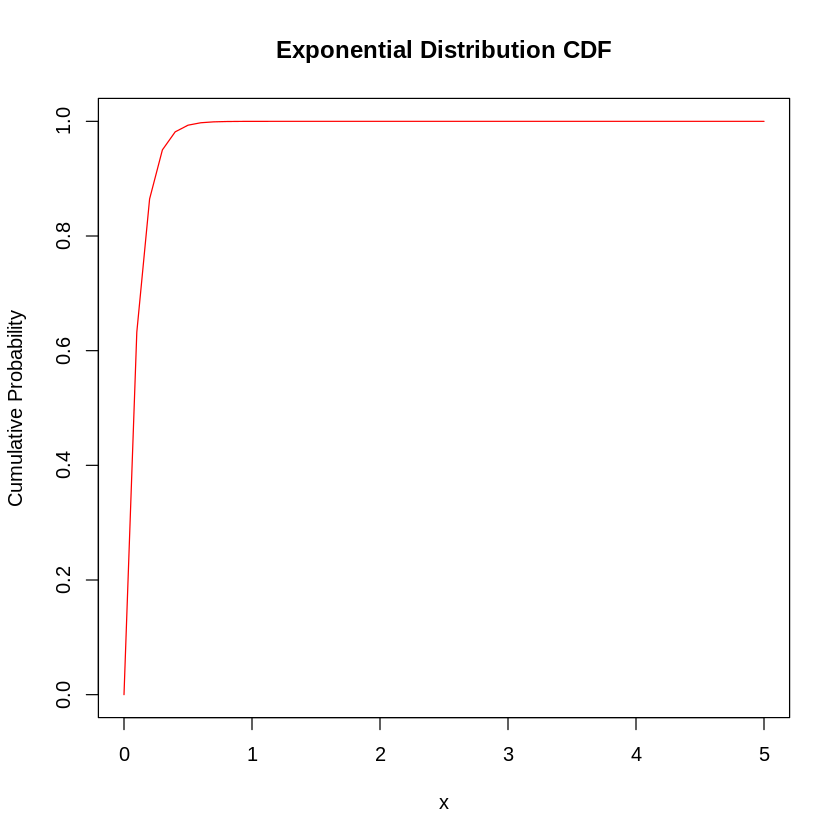

In [ ]:
# Define rate parameter
rate <- 10

# Define x-values for plotting
x <- seq(0, 5, by = 0.1)  # Values from 0 to 5

# Calculate PDF and CDF values
pdf_values <- dexp(x, rate)
cdf_values <- pexp(x, rate)

# Plot PDF
plot(x, pdf_values, type = "l", col = "blue",
     main = "Exponential Distribution PDF",
     xlab = "x", ylab = "Density")

# Plot CDF
plot(x, cdf_values, type = "l", col = "red",
     main = "Exponential Distribution CDF",
     xlab = "x", ylab = "Cumulative Probability")

Let's review here some non common distributions that could fit my data that has a high frequency at zero and a rapid decay

*TODO: review these distributions and fits*

1. Zero-Inflated Distributions:

    Zero-inflated Poisson (ZIP): This distribution is commonly used for count data with excess zeros. It combines a Poisson distribution with a point mass at zero. The Poisson component models the counts greater than zero, while the point mass accounts for the extra zeros.
    Zero-inflated negative binomial (ZINB): Similar to ZIP, but the negative binomial component is used instead of Poisson, which can handle overdispersion (variance greater than the mean) often found in count data.


2. Hurdle Models:

    Hurdle Poisson/Negative Binomial: These models have two components: a binary component that determines whether the value is zero or positive, and a count component (Poisson or negative binomial) that models the positive values. This allows for more flexibility in modeling the excess zeros.

3. Mixture Distributions:

    Mixture of a point mass at zero and an exponential distribution: This could be a simple way to capture the high frequency at zero and rapid decay. The point mass represents the probability of observing zero, while the exponential distribution models the positive values.
    Mixture of a point mass at zero and a gamma distribution: Similar to the above, but the gamma distribution offers more flexibility in shaping the decay of the positive values.

4. Tweedie Distribution:

    This distribution is a flexible family of distributions that can model data with a point mass at zero and a continuous positive distribution. It has a parameter that controls the shape of the distribution, allowing it to capture various decay patterns.
